<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Tugas *3*: *Regresi***

### **Tenggat Waktu: 18 November 2021, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dataset yang digunakan pada tugas ini beserta deskripsinya telah disediakan di SCeLe.
2. Buatlah program Jupyter Notebook yang menjawab pertanyaan sesuai dengan perintah soal yang disediakan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_TugasX_NPM_Nama.ipynb**. Contoh: F_Tugas1_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **18 November 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Praktikum ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [508]:
# Isi dengan data diri Anda
NAMA = "Fahdii Ajmalal Fikrie"
KELAS = "D"
NPM = "1906398370"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = [
    "Hugo Irwanto: ngasih tau kalo geography didrop dan binnedInc di encode"
]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [509]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Fahdii Ajmalal Fikrie dari kelas D dengan NPM 1906398370, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Fahdii Ajmalal Fikrie)


In [510]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import (LinearRegression, Ridge)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from IPython.display import display
from pprint import pprint

## **Preprocessing**

### Nomor 1
[10] Berikan ringkasan mengenai data tersebut terkait dengan deskripsi setiap atribut, jumlah atribut (numerik & kategorik), jumlah missing values, jumlah duplikasi data, dan kemungkinan adanya outliers pada data!

In [511]:
# Mengimpor dataset
cancer_df = pd.read_csv("cancer_reg.csv")
cancer_df.head(5)

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,1,2
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,2,3
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1


In [512]:
# Deskripsi setiap atribut/fitur
print("Deskripsi setiap atribut/fitur: \n")
cancer_df.info()

Deskripsi setiap atribut/fitur: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   flo

In [513]:
# Deskripsi dan jumlah masing-masing atribut numerik
print("Deskripsi dan jumlah masing-masing atribut numerik: \n")
cancer_df.describe()

Deskripsi dan jumlah masing-masing atribut numerik: 



,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306,1.467017,2.084345
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816,0.498993,0.737185
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.000000,1.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419,1.000000,2.000000
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478,1.000000,2.000000
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677,2.000000,3.000000
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165,2.000000,3.000000


In [514]:
# Deskripsi dan jumlah masing-masing atribut kategorik
print("Deskripsi dan jumlah masing-masing atribut kategorik: \n")
cancer_df.describe(include=np)

Deskripsi dan jumlah masing-masing atribut kategorik: 



,binnedInc,Geography
count,3047,3047
unique,10,3047
top,"(54545.6, 61494.5]","Kitsap County, Washington"
freq,306,1


In [515]:
def cek_null(df):
    """
    Fungsi untuk mengecek null/missing value
    Courtesy Tutorial Lab 3
    """
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

# Mengecek missing value pada cancer_df
print("Missing value pada cancer_df: \n")
cek_null(cancer_df)

Missing value pada cancer_df: 

                         Total   Percent
PctSomeCol18_24           2285  0.749918
PctPrivateCoverageAlone    609  0.199869
PctEmployed16_Over         152  0.049885


In [516]:
# Menghitung jumlah duplicates pada setiap kolom
print("Jumlah duplicates pada cancer_df: \n")
cancer_df.duplicated(keep=False).sum()

Jumlah duplicates pada cancer_df: 



0

In [527]:
# Menghitung jumlah outliers pada setiap kolom
Q1 = cancer_df.quantile(0.25)
Q3 = cancer_df.quantile(0.75)
IQR = Q3 - Q1

print("Jumlah outliers pada setiap atribut/kolom: \n")
outlier_data = ((cancer_df < (Q1 - 1.5 * IQR)) | (cancer_df > (Q3 + 1.5 * IQR))).sum()
pprint(outlier_data)

Jumlah outliers pada setiap atribut/kolom: 

AvgHouseholdSize           201
BirthRate                  164
Geography                    0
MedianAge                   93
MedianAgeFemale             78
MedianAgeMale               89
PctAsian                   323
PctBachDeg18_24             94
PctBachDeg25_Over           82
PctBlack                   395
PctEmpPrivCoverage           9
PctEmployed16_Over          20
PctHS18_24                  52
PctHS25_Over                31
PctMarriedHouseholds       100
PctNoHS18_24                69
PctOtherRace               297
PctPrivateCoverage          21
PctPrivateCoverageAlone      4
PctPublicCoverage           18
PctPublicCoverageAlone      36
PctSomeCol18_24             31
PctUnemployed16_Over        68
PctWhite                   174
PercentMarried              68
TARGET_deathRate            64
TARGET_logistic              0
TARGET_softmax               0
avgAnnCount                461
avgDeathsPerYear           349
binnedInc                

/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_80122/3115314756.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outlier_data = ((cancer_df < (Q1 - 1.5 * IQR)) | (cancer_df > (Q3 + 1.5 * IQR))).sum()


### Nomor 2
[5] Berdasarkan eksplorasi anda pada nomor 1, lakukan data preparation hingga data tersebut menurut anda cukup “clean” dan dapat memberikan hasil regresi yang maksimal.

**Memproses null/missing value**

Missing value ditemukan pada tiga kolom, yaitu `PctSomeCol18_24`, `PctPrivateCoverageAlone`, `PctEmployed16_Over`.

Pada fitur `PctSomeCol18_24`, akan didrop karena nilai missing value yang besar (77%). Untuk sisanya, pendekatan processing untuk missing value yang dipilih adalah pendekatan data imputation dengan menggunakan mean.

In [518]:
# Mendrop kolom PctSomeCol18_24
cancer_df_processed = cancer_df.copy(deep=True)
cancer_df_processed = cancer_df_processed.drop(['PctSomeCol18_24'], axis=1)

# Data imputation w/ Mean untuk kolom PctPrivateCoverageAlone dan PctEmployed16_Over
cancer_df_processed['PctPrivateCoverageAlone'].fillna((
    cancer_df_processed['PctPrivateCoverageAlone'].mean()),
    inplace=True
)
cancer_df_processed['PctEmployed16_Over'].fillna((
    cancer_df_processed['PctEmployed16_Over'].mean()),
    inplace=True
)

print("Kolom dengan NaN/Missing Value setelah diproses: \n")
cek_null(cancer_df_processed)
display(cancer_df_processed.shape)

Kolom dengan NaN/Missing Value setelah diproses: 

Empty DataFrame
Columns: [Total, Percent]
Index: []


(3047, 35)

**Special Treatment untuk Geography dan binnedInc**

In [519]:
cancer_df_processed = cancer_df_processed.drop(['Geography'], axis=1)

label_encoder = LabelEncoder()
cancer_df_processed['binnedInc'] = label_encoder.fit_transform(cancer_df_processed['binnedInc'])

**Memproses Outlier**

Melakukan proses 'filtering' dengan membuang data yang merupakan outlier. Baris kode diambil dari jawaban Lab 3 saya.

In [520]:
cancer_df_processed = cancer_df_processed[
    ~((cancer_df_processed < (Q1 - 1.5 * IQR)) | (cancer_df_processed > (Q3 + 1.5 * IQR))).any(axis=1)
]

print("Data jumlah outliers masing-masing kolom setelah diproses: \n")
((cancer_df_processed < (Q1 - 1.5 * IQR)) | (cancer_df_processed > (Q3 + 1.5 * IQR))).sum()
display(cancer_df_processed.shape)

Data jumlah outliers masing-masing kolom setelah diproses: 



/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_80122/463513385.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ~((cancer_df_processed < (Q1 - 1.5 * IQR)) | (cancer_df_processed > (Q3 + 1.5 * IQR))).any(axis=1)
/var/folders/4y/f7n6cknn4dd3pvy303271wjh0000gn/T/ipykernel_80122/463513385.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((cancer_df_processed < (Q1 - 1.5 * IQR)) | (cancer_df_processed > (Q3 + 1.5 * IQR))).sum()


(1235, 34)

Jadi ngurang setengah datasetnya :(

### Nomor 3
[10] Menurut Anda, apakah perlu dilakukan normalisasi terhadap data sebelum pemrosesan lebih lanjut, atau cukup menggunakan data asli? Jika ya, bentuk normalisasi apa yang tepat digunakan pada data? Jelaskan secara singkat alasan Anda!

## **Regresi**
(Penggunaan library diperbolehkan). Gunakan TARGET_deathRate sebagai kolom target.

In [521]:
# Mengekstrak data dan target/label
label = cancer_df_processed[['TARGET_deathRate']]
data = cancer_df_processed.drop(['TARGET_deathRate'], axis=1)

display(data)

# Membagi dataset menjadi training set dan test set
# dengan jumlah training set adalah sebanyak 80% dari data keseluruhan
data_train, data_test, label_train, label_test = train_test_split(data, label, train_size=0.8)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_logistic,TARGET_softmax
1,173.0,70,411.6,48127,43269,18.6,23.111234,5,33.0,32.2,...,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,1,2
2,102.0,50,349.7,49348,21026,14.6,47.560164,5,45.0,44.0,...,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1,2
4,57.0,26,350.1,49955,10321,12.5,0.000000,5,48.3,47.8,...,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1,1
5,428.0,152,505.4,52313,61023,15.6,180.259902,6,45.4,43.5,...,43.2,20.2,84.882631,1.653205,1.538057,3.314635,51.220360,4.964476,1,2
7,146.0,71,404.0,40189,20848,17.8,0.000000,1,51.7,50.8,...,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,46.0,19,475.5,46501,6205,13.1,0.000000,4,43.7,40.9,...,37.6,17.5,95.879607,0.209239,0.611621,1.738291,55.575802,5.024311,2,2
3007,50.0,21,463.5,42555,7344,14.4,0.000000,2,43.9,42.8,...,38.7,19.5,97.927879,0.605490,0.242196,0.080732,60.394022,7.260963,2,2
3014,113.0,40,431.4,55984,20709,9.4,48.288184,7,40.6,39.9,...,25.6,9.7,96.672093,0.948094,1.240184,0.296878,56.280310,3.507692,1,1
3016,49.0,16,470.0,50286,7569,11.0,0.000000,5,44.8,44.8,...,35.3,16.1,97.196880,0.965225,0.158667,0.251223,53.836478,8.338679,1,1


### Nomor 1
[15] Implementasikan Linear Regression pada data hasil preprocessing. Gunakan Method dari library sklearn.

a. Tampilkan visualisasi hasil prediksi

b. Tampilkan nilai MSE, MAE, RMSE, dan R2 Square

**Menginisiasi model Linear Regression**

In [522]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(data_train, label_train)

LinearRegression()

**Menampilkan visualisasi hasil prediksi**

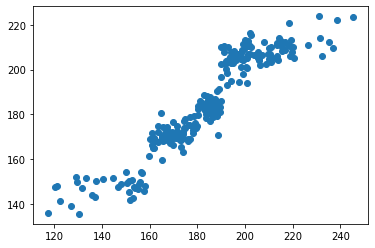

In [523]:
linear_reg_prediction = linear_reg_model.predict(data_test)
plt.scatter(label_test['TARGET_deathRate'], linear_reg_prediction)

**Menampilkan nilai MSE, MAE, RMSE, dan R2 Square**

In [524]:
MSE = metrics.mean_squared_error(label_test, linear_reg_prediction)
MAE = metrics.mean_absolute_error(label_test, linear_reg_prediction)
RMSE = np.sqrt(metrics.mean_squared_error(label_test, linear_reg_prediction))
R2_SQUARE = metrics.r2_score(label_test, linear_reg_prediction)

print(f'MAE: {MAE}')
print(f'MSE: {MSE}')
print(f'RMSE: {RMSE}')
print(f'R2 SQUARE: {R2_SQUARE}')

MAE: 6.537739237048188
MSE: 73.28209720546934
RMSE: 8.560496317706663
R2 SQUARE: 0.8697255815972824


### Nomor 2
[15] Implementasikan Ridge Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


**Menginisiasi model Ridge Regression**

In [ ]:
ridge_reg_model = Ridge()
ridge_reg_model.fit(data_train, label_train)

### Nomor 3
[15] Implementasikan Lasso Regression pada data hasil preprocessing. Gunakan method dari library sklearn.

a. Tampilkan nilai R2 Square

b. Coba ubah parameter alpha dengan nilai yang lebih besar dan analisis bagaimana hubungan perubahan parameter tersebut dengan kualitas hasil regresi.


NOTE: Parameter alpha adalah parameter yang merepresentasikan “kekuatan” dari regularisasi yang dilakukan oleh model. Regularisasi adalah teknik modifikasi yang digunakan untuk mengurangi *generalization error*, dengan kata lain menghindari *overfitting*. Hal ini dilakukan dengan memberikan batasan/*constraint* atau penambahan penalti pada parameter/atribut yang kita gunakan. Untuk lebih jelas, silahkan baca dokumentasi model Ridge dan Lasso yang ada pada link berikut : [API Reference — scikit-learn 1.0.1 documentation ](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model)

## **Logistic and Softmax Regression**

### Nomor 1
[15] Implementasikan Logistic Regression dengan target yang digunakan adalah kolom TARGET_logistic. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat (baca method .score() pada dokumentasi sklearn)


### Nomor 2
[15] Implementasikan Softmax Regression dengan target yang digunakan adalah kolom TARGET_softmax. Gunakan method dari library sklearn.

a. Visualisasikan hasil regression yang didapat dengan membandingkan hasil prediksi dan nilai target aktual.

b. Tampilkan rata-rata akurasi yang didapat.
